In [1]:
include("./QuantumIsing.jl")

Main.QuantumIsing

In [2]:
using .QuantumIsing
using LaTeXStrings
using LinearAlgebra

using Plots
pyplot()

Plots.PyPlotBackend()

## The intended phase diagram
The Hamiltonian we considered is $$H = \sum_{i}\sigma^{z}_{i}\sigma^{z}_{i+1}-h_x\sum_{i}\sigma_{i}^{x}-h_z\sum_{i}\sigma_{i}^{z}.$$ This initial state of the system is antiferromagnetic, as we probe the system by varying $h_x$ and $h_z$, the system will process a phase transition to paramagnetic state. The phase diagram is as following. On the critical line, the system is gapless.

In [3]:
hxs = 0.1:0.01:0.8;
hzs = 0.1:0.01:0.9;
hx_lst = zeros(length(hzs))

@time for (i, hz) in enumerate(hzs)
    for j in 1:1:length(hxs)-1
        m1, m2 = critical_line(N=10, hx=hxs[j], hz=hz) 
        m1prime, m2prime = critical_line(N=10, hx=hxs[j+1],hz=hz)
        if m2prime > m2
            hx = (hxs[j+1]+hxs[j])/2
            # println(hx," ",hz)
            hx_lst[i] = hx
            break
        end
    end
end

214.616487 seconds (227.04 M allocations: 211.687 GiB, 9.26% gc time, 2.96% compilation time)


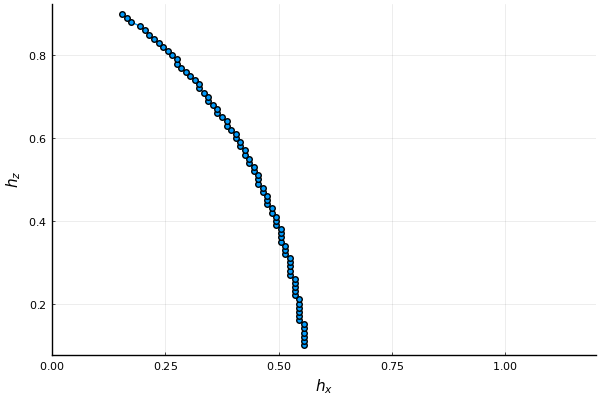

In [5]:
p1 = plot(xlab=L"$h_x$", ylab=L"$h_z$", xlim=(0,1.2), legend=false);

#annotate!((0.35, 0.5, "Antiferromagnetic"));
#annotate!(1.00, 1.5, "Paramagnetic");

plot!(p1, hx_lst, hzs, marker=:circle)

# Clarifications of the phase diagram
The phase diagram listed above can be verified by considering 1st/2nd order derivatives of z-directional average magnetization. We notice here that when $h_x<<1$ (i.e., the multicritical point), the system undergoes a first-order phase transition as $hz$ approaching 1 as shown in the following diagram in which we take $hx$ as 0.1.

In [6]:
hs1 = 0:0.05:2.5;

M1 = zeros(length(hs1));
@time for (i, h) in enumerate(hs1)
    vals, vecs = generate_eigs(N=14, hx=0.1, hz=h)
    groundstate = @view vecs[:,1]
    M1[i] = magnetization(groundstate, z=true)
    # println(M)
end

h, deri = derivative(x=hs1, y=M1);

  5.315430 seconds (4.79 M allocations: 11.498 GiB, 14.27% gc time, 0.03% compilation time)


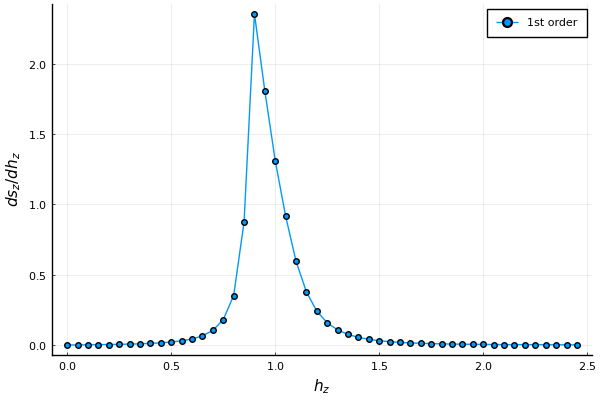

In [7]:
p2 = plot(xlab=L"$h_z$", ylab=L"$ds_z/dh_z$");

plot!(p2, h, deri, marker=:circle, label="1st order")

<hr style="border:1.5px solid gray"> </hr>
In the middle area (i.e., $0<h_x<1$), the first order derivative cannot appropriately detect the phase transtion point, which indicates that in middle area the system undergoes second order phase transition. As we can see in the following diagrams in which we take $h_x=0.5$

In [8]:
hs2 = 0:0.05:2
M2 = zeros(length(hs2))

@time for (i, h) in enumerate(hs2)
    vals, vecs = generate_eigs(N=14, hx=0.5, hz=h)
    groundstate = @view vecs[:,1]
    M2[i] = magnetization(groundstate, z=true)
    # println(M)
end

# Taking the first derivative
h, deri = derivative(x=hs2, y=M2);
# Taking the second derivative
h1, deri1 = derivative(x=h, y=deri);

  4.216961 seconds (3.85 M allocations: 9.243 GiB, 12.64% gc time)


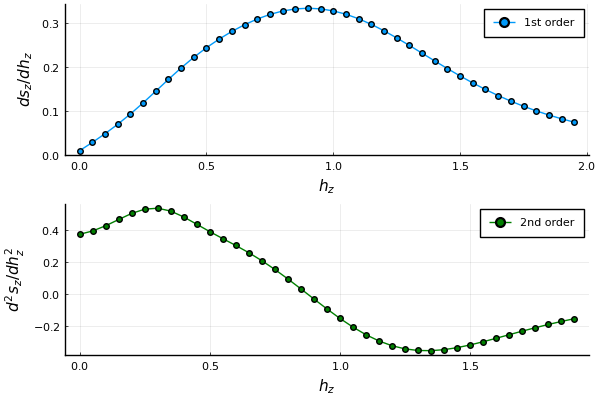

In [9]:
p2 = plot(layout=grid(2,1, heights=[0.5,0.5]), xlab=L"$h_z$")
plot!(p2[1], h, deri, marker=:circle, label="1st order", ylab=L"$ds_z/dh_z$")
plot!(p2[2], h1, deri1, marker=:circle, label="2nd order", ylab=L"$d^{2}s_z/dh_{z}^{2}$", color=:green)

<hr style="border:1.5px solid gray"> </hr>
When $h_z$ approaching 0, again the system undergoes a second-order phase transition, as we can see in the following diagrams. We expect such phase transition happens near $h_x=0.5$.

In [12]:
hs3 = 0.0:0.05:1.2
M3 = zeros(length(hs3))

@time for (i, h) in enumerate(hs3)
    vals, vecs = generate_eigs(N=14, hx=h, hz=0)
    groundstate = @view vecs[:,1]
    M3[i] = magnetization(groundstate, z=false)
    # println(M)
end

# Taking the first derivative
h, deri = derivative(x=hs3, y=M3);
# Taking the second derivative
h1, deri1 = derivative(x=h, y=deri);

  1.819640 seconds (301.85 k allocations: 3.956 GiB, 7.38% gc time)


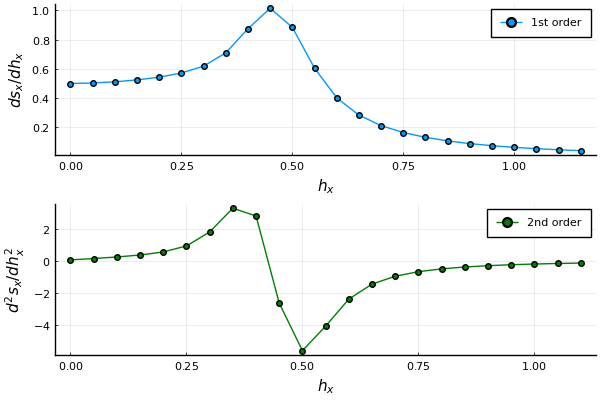

In [13]:
p3 = plot(layout=grid(2,1, heights=[0.5,0.5]), xlab=L"$h_x$")
plot!(p3[1], h, deri, marker=:circle, label="1st order", ylab=L"$ds_x/dh_x$")
plot!(p3[2], h1, deri1, marker=:circle, label="2nd order", ylab=L"d^2s_x/dh_x^2", color=:green)

## 2nd order derivatives of $s_z$
If we probe the system by adding sites $N$, we can observe obvious 2nd order phase transitions in middle areas by calculting 2nd order derivatives of $s_z$ with repective to $h_z$ at different $N$. Notice that we take $h_x=0.25$, and according to the first phase diagram, we expect the phase transition takes place around $h_z=0.8$.

In [24]:
#hs3 = 10 .^ range(1/3, stop=1/3, length=15);
hs3 = 0:0.1:1.5

M4 = zeros(length(hs3));
M5 = zeros(length(hs3));
M6 = zeros(length(hs3));
M7 = zeros(length(hs3));

@time for (i,h) in enumerate(hs3)
    vals1, vecs1 = generate_eigs(N=8, hx=0.25, hz=h, rotated=false)
    vals2, vecs2 = generate_eigs(N=10, hx=0.25, hz=h, rotated=false)
    vals3, vecs3 = generate_eigs(N=12, hx=0.25, hz=h, rotated=false)
    vals4, vecs4 = generate_eigs(N=14, hx=0.25, hz=h, rotated=false)
    groundstate1 = @view vecs1[:,1]
    groundstate2 = @view vecs2[:,1] 
    groundstate3 = @view vecs3[:,1]
    groundstate4 = @view vecs4[:,1] 
    M4[i] = magnetization(groundstate1, z=true)
    M5[i] = magnetization(groundstate2, z=true)
    M6[i] = magnetization(groundstate3, z=true)
    M7[i] = magnetization(groundstate4, z=true)
end

h1, deri1 = derivative(x=hs3, y=M4);
h12, deri12 = derivative(x=h1, y=deri1);
h2, deri2 = derivative(x=hs3, y=M5);
h22, deri22 = derivative(x=h2, y=deri2);
h3, deri3 = derivative(x=hs3, y=M6);
h32, deri32 = derivative(x=h3, y=deri3);
h4, deri4 = derivative(x=hs3, y=M7);
h42, deri42 = derivative(x=h4, y=deri4);

  2.367009 seconds (2.21 M allocations: 4.641 GiB, 10.64% gc time)


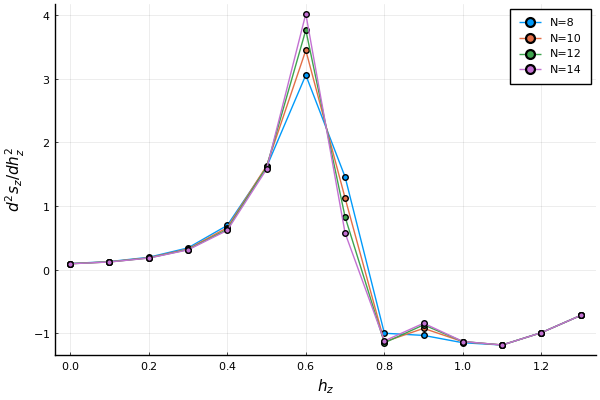

In [25]:
p4 = plot(xlab=L"h_z",ylab=L"d^2s_z/dh_z^2");
plot!(p4, h12, deri12, marker=:circle, label="N=8");
plot!(p4, h22, deri22, marker=:circle, label="N=10");
plot!(p4, h32, deri32, marker=:circle, label="N=12");
plot!(p4, h42, deri42, marker=:circle, label="N=14")

# The central charge $c$
From conformal field theory, the ground state energy at the critical line in the first phase diagram is given in the form $$E_0=e_{\infty}N-\frac{\pi cv}{6N},$$ in which $e_{\infty}$ is the ground state energy per site in the thermodynamic limit and $v$ is the sound velocity in the thermodynamic limit. In finite size system, $v$ is given in the form $$v(N)=\frac{N}{2\pi}\left[E(\pi-\frac{2\pi}{N})-E(\pi)\right].$$ When $h_z << 1$, the energy spectrum $E$ at the critical $h_{xc}$ can be calculated in the form $$E(k)=\cos(\frac{k}{2}).$$

## Size extrapolation
To reach $e_{\infty}$ and $v$ in the thermodynamic limit, we can first calculate $e$ and $v$ at finite $N$. In our case, we use $N\leq 18$.

In [16]:
function sound_velocity(N::Int)
    v = (N/(2*π))*(cos((π-2π/N)/2)-cos(π/2))
    return v
end

sound_velocity (generic function with 1 method)

In [17]:
Ns = 8:2:20
Ns_mod = [1/N^2 for N in Ns]
vs = zeros(length(Ns))
for (i, N) in enumerate(Ns)
    vs[i] = sound_velocity(N)
end

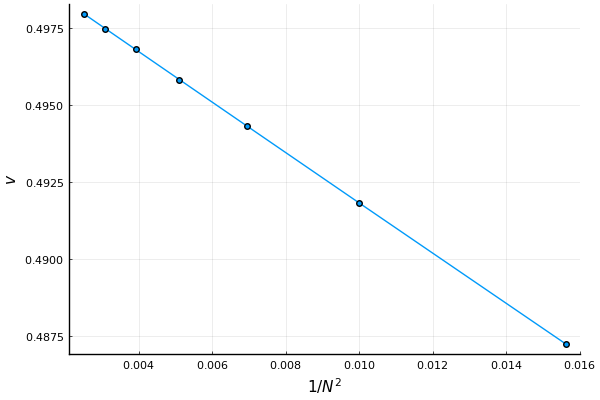

In [18]:
plot(Ns_mod, vs, xlab=L"$1/N^2$", ylab=L"v", marker=:circle, legend=false)

In [80]:
es = zeros(length(Ns))
for (i, N) in enumerate(Ns)
    vals, vecs = generate_eigs(N=N, hx=0.25, hz=0.747, gstate=true)
    es[i] = vals[1]/N
end

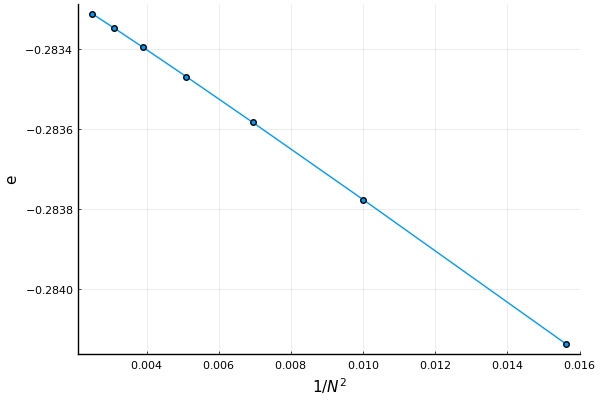

In [81]:
plot(Ns_mod, es, marker=:circle, legend=false, xlab=L"1/N^2", ylab="e")

with these two linear relationships, we can approximately get linear equations of $e$ and $v$ with respect to $1/N^2$.

In [82]:
k1 = (last(vs)-vs[1])/(last(Ns_mod)-Ns_mod[1]);
k2 = (last(es)-es[1])/(last(Ns_mod)-Ns_mod[1]);

In [83]:
v(N) = (vs[2]-k1*Ns_mod[2]) + k1*(1/N^2)

v (generic function with 1 method)

In [84]:
e_per_site(N) = (es[2]-k2*Ns_mod[2]) + k2*(1/N^2)

e_per_site (generic function with 1 method)

We set $N=100000$ to simulate thermodynamic behaviors.

In [85]:
v_inf = v(1000000)

0.4999672031939193

In [86]:
e_inf = e_per_site(1000000)

-0.28314759108226967

Now we can calculate the central charge $c$ with the first equation in this section.
$$c=\frac{6N}{\pi v}(e_{\infty}N-E_0)$$

In [87]:
function c(N::Int)
    vals, vecs = generate_eigs(N=N, hx=0.25, hz=0.75, gstate=true)
    c = (6*N)/(π*v_inf)*(e_inf*N-vals[1])
    return c
end

c (generic function with 1 method)

In [88]:
c_val = 0
for i in 8:2:20
    c_val += c(i)
end

print("The central charge is ", c_val/length(8:2:20))

The central charge is 0.4868778843917187

We get the central charge $c=0.5$ at the critical line. This is interesting in two senses: <br />
1). This gives us a classification of the model considered. Namely, we would reasonably argue that any model with similar Hamiltonian as listed at the beginning of this note will have central charge equals $0.5$, hence these models will possess a similar phase diagram as listed at the beginning of this note. <br />
2). Now with this central charge specified, we get a closed formula of the ground state energy at the critical line for abitrary $N$. This can be comfirmed with the comparison with numerical computations.

# Entanglement entropy
In this section, we seperate the system into bipartite system. We will study the relationship between entanglement entropy and $h_z$ where we take $h_x=0.5$. We take $N=12$ and consider equal bipartite system. Namely, each subsystem contains 6 sites.

In [ ]:
hs4 = 0.05:0.1:2.5
ee = Array{Float64, 1}(undef, length(hs4))
ee_explict = Array{Float64, 1}(undef, length(hs4))
i = 1
@time for h in hs4
    vals, vecs = generate_eigs(N=12, hx=0.5, hz=h)
    rd_mat = reduced_density_matrix(state=vec(vecs), int_rank=64)
    F = svd(rd_mat)
    ee[i] = -F.S'*log2.(F.S)
    #ee_explict[i] = -tr(rd_mat*log.(rd_mat))
    i += 1
end

In [ ]:
p5 = plot(xlab=L"h_z", ylab=L"-\sum_{i}\lambda_{i}log(\lambda_{i})");
plot!(p5, hs4, ee, marker=:circle)
#plot!(p5, hs4, ee_explict, marker=:square)

In [ ]:
function long_range_spectrum(;v1=0, v2=0, omega=0, k=0)
    ϵ_k = (1/8)